<center style="color:red;font-size:50px;font-family:courier">Prediction Of Heart Diseases Using Machine Learning And Deep Learning </center>

<center><h1 style='font-family:courier'>Objective:Feature extraction and exploratory data analysis on dataset.Applied machine learning algorithms on the dataset and predict the output for the diabetes.Tensorflow and keras used for prediction for finding accuracy</h1></center>

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Import Libraries</h1></center>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv


In [3]:
data=pd.read_csv("/kaggle/input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv")

In [4]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Data processing and cleaning</h1></center>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
data.shape

(253680, 22)

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Exploratory data analysis</h1></center>

In [9]:
data['HeartDiseaseorAttack'].unique()

array([0., 1.])

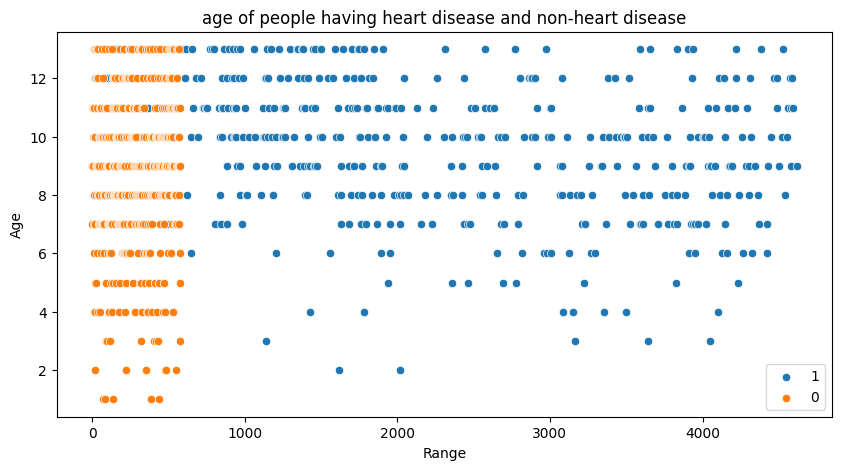

In [10]:
plt.figure(figsize=(10,5))

data0=data[data['HeartDiseaseorAttack']==0.0]

data1=data[data['HeartDiseaseorAttack']==1.0]



sns.scatterplot(data1['Age'].head(500),label="1")
sns.scatterplot(data0['Age'].head(500),label="0")



plt.title("age of people having heart disease and non-heart disease")

plt.ylabel("Age")

plt.xlabel("Range")

plt.show()

Text(0.5, 1.0, 'disease')

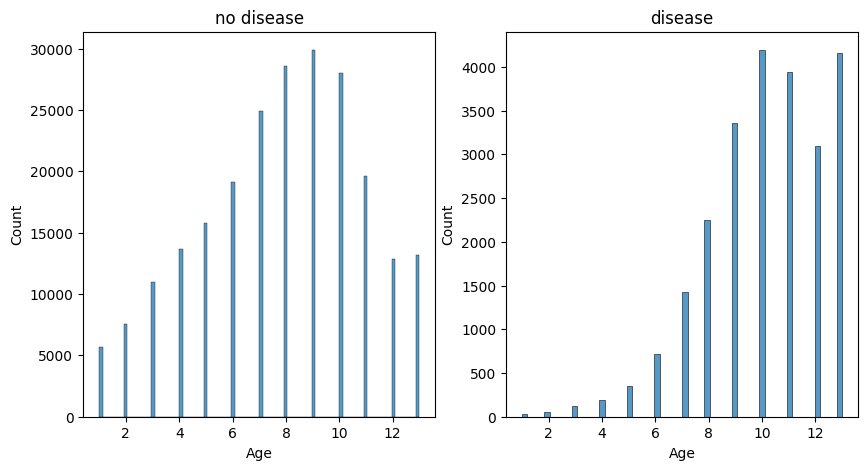

In [11]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.histplot(ax=axes[0],x=data0['Age'])
sns.histplot(ax=axes[1],x=data1["Age"])
axes[0].set_title("no disease")
axes[1].set_title("disease")


1.0    13688
0.0    10205
Name: Sex, dtype: int64


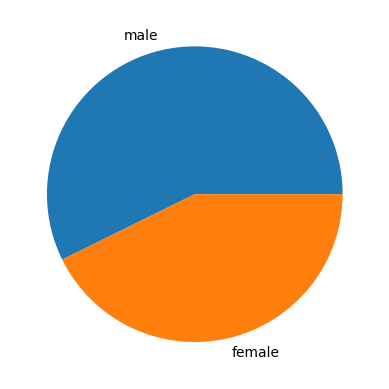

In [12]:
print(data1['Sex'].value_counts())

l=list((data1['Sex'].value_counts()))
l


plt.pie(l,labels=['male','female'])


plt.show()

(253680, 22)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


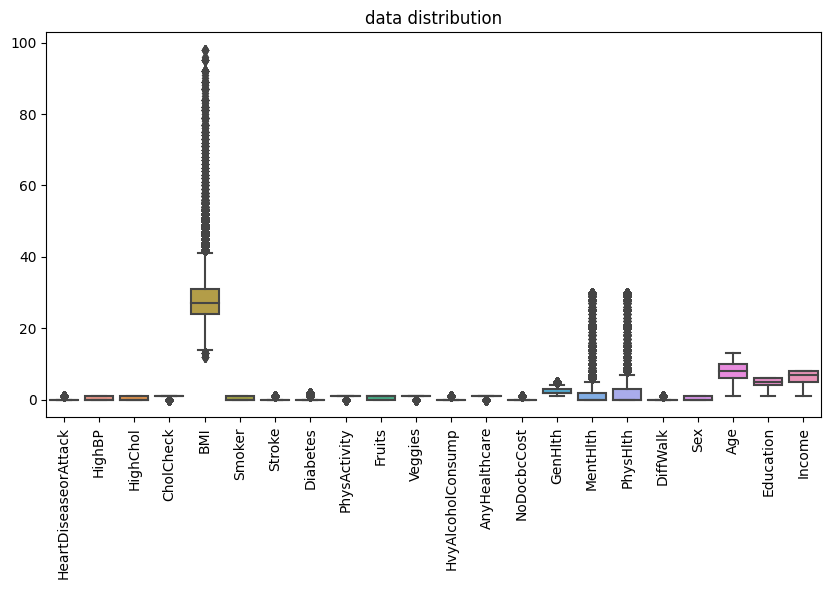

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data)
print(data.shape)
l=list(np.arange(22))
print(l)
plt.title("data distribution")
plt.xticks(l, list(data.columns),
       rotation=90)
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Data spilting and training model</h1></center>

In [14]:
y=data[['HeartDiseaseorAttack']]


x=data.drop('HeartDiseaseorAttack',axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


model=StandardScaler()

new_data=model.fit_transform(x_test)

x_test=pd.DataFrame(new_data)
                    
                    
new_data=model.fit_transform(x_train)

x_train=pd.DataFrame(new_data)                    
                    

(253680, 22)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


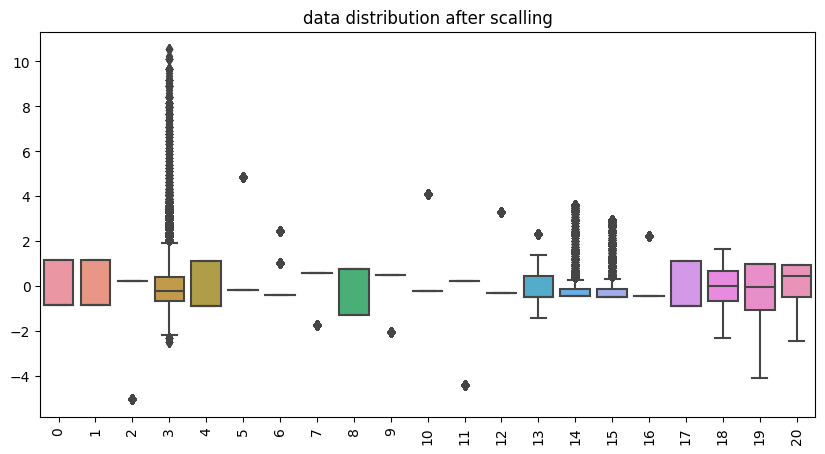

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x_train)
print(data.shape)
l=list(np.arange(21))
print(l)
plt.title("data distribution after scalling")
plt.xticks(l, list(x_train.columns),
       rotation=90)
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Logistic Regression</h1></center>

In [16]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix


model=LogisticRegression()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))


pred=model.predict(x_test)




0.9091966256701356


Text(0.5, 1.0, 'confusion matrix for Logistic regression')

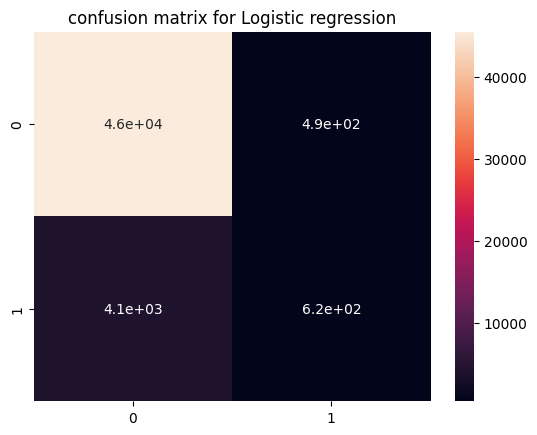

In [17]:
cn=confusion_matrix(y_test,pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Logistic regression")

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     46004
         1.0       0.56      0.13      0.21      4732

    accuracy                           0.91     50736
   macro avg       0.74      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



In [19]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Decision tree classifier</h1></center>

In [20]:
from sklearn.tree import DecisionTreeClassifier


model=DecisionTreeClassifier()


model.fit(x_train,y_train)

print(model.score(x_test,y_test))

pred=model.predict(x_test)

0.8515452538631346


Text(0.5, 1.0, 'confusion matrix for Decision tree')

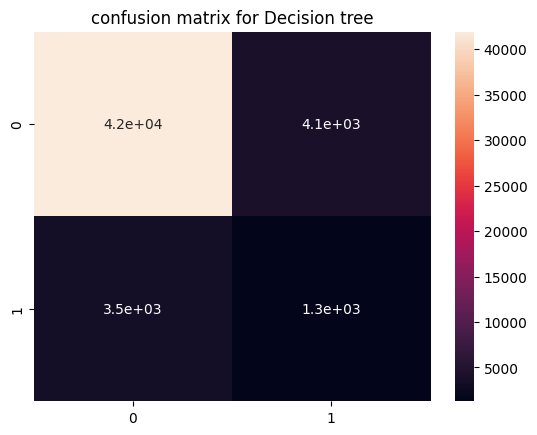

In [21]:
cn=confusion_matrix(y_test,pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Decision tree")

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     46004
         1.0       0.24      0.27      0.25      4732

    accuracy                           0.85     50736
   macro avg       0.58      0.59      0.59     50736
weighted avg       0.86      0.85      0.86     50736



In [25]:
from sklearn.metrics import roc_curve
fpr2, tpr2, thresh2 = roc_curve(y_test, pred, pos_label=1)

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Random forest regressor</h1></center>

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()


model.fit(x_train,y_train)


print(model.score(x_test,y_test))


pred=model.predict(x_test)

0.9031851151056449


In [28]:

from sklearn.metrics import roc_curve
fpr3, tpr3, thresh3 = roc_curve(y_test, pred, pos_label=1)

In [29]:
params = {'n_estimators':np.arange(2,10),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,5),
         'min_samples_leaf':np.arange(1,5),
         'min_samples_split':np.arange(2,5),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestClassifier()

rf_hyper_model=RandomizedSearchCV(rf_model,params)

In [30]:
rf_hyper_model.fit(x_train,y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [10]})

In [31]:
rf_hyper_model.best_params_

{'random_state': 10,
 'n_estimators': 4,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'gini'}

In [32]:
rf_hyper_model.score(x_test,y_test)

0.9078957742037213

Text(0.5, 1.0, 'confusion matrix for Random forest')

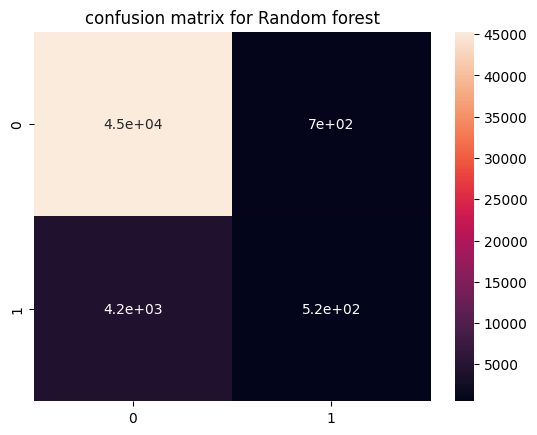

In [33]:
cn=confusion_matrix(y_test,pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Random forest")

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>KNeighborsClassifier</h1></center>

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8964640491958372

In [36]:
pred=model.predict(x_test)
from sklearn.metrics import roc_curve
fpr4, tpr4, thresh4 = roc_curve(y_test, pred, pos_label=1)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     46004
         1.0       0.37      0.15      0.21      4732

    accuracy                           0.90     50736
   macro avg       0.64      0.56      0.58     50736
weighted avg       0.87      0.90      0.88     50736



In [40]:
cn=confusion_matrix(y_test,pred)

Text(0.5, 1.0, 'confusion matrix for Kneighbors classifier')

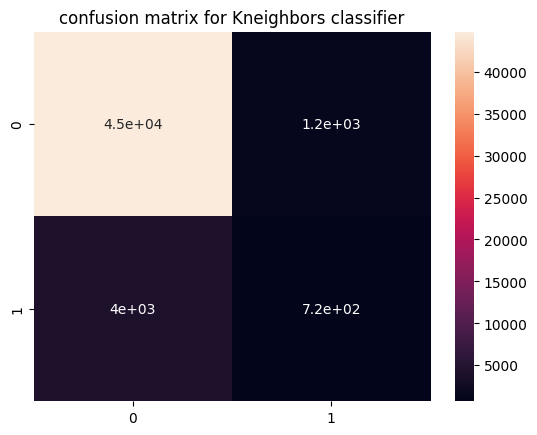

In [41]:
cn=confusion_matrix(y_test,pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Kneighbors classifier")

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Ada Boost Classifier</h1></center>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

regr = AdaBoostClassifier(random_state=0, n_estimators=1000)
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

pred=regr.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

from sklearn.metrics import roc_curve
fpr5, tpr5, thresh5 = roc_curve(y_test, pred, pos_label=1)

In [ ]:
cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True)
plt.title("confusion matrix for ada boost")

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Gradient Boosting Classifier</h1></center>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)

print(regr.score(x_test, y_test))

pred=regr.predict(x_test)

In [ ]:
print(classification_report(y_test,pred))

from sklearn.metrics import roc_curve
fpr6, tpr6, thresh6 = roc_curve(y_test, pred, pos_label=1)

In [ ]:
cn=confusion_matrix(y_test,pred)

sns.heatmap(cn,annot=True)
plt.title("confusion matrix for gradient boost")

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision tree classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='Random forest')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Kneighbors classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Ada Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Gradient search')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.title("roc curve")
plt.grid()
plt.show()

<center><h1 style='background-color:#99ccff;padding:10px;font-family:courier'>Tensorflow</h1></center>

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(7,activation="relu",input_dim=8))
model.add(Dense(7,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(28,activation="relu"))


model.add(Dense(1,activation="sigmoid"))# for classification

In [ ]:
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="Adam")

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)
pred=model.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,pred)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val loss")
plt.title("loss vs val_loss")
plt.legend()
plt.grid()
plt.xlabel("Epoch")
plt.show()

# Thank You